# **Naive Bayes**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Naive Bayes en la clasificacion pulpa de papas
```

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

## **2. Leer datos**

In [2]:
# Creación de etiquetas para los pixeles
pixel_num = ['p' + str(i + 1) for i in range(90000)]
pixel_num.append('variedad')

In [3]:
datos = pd.read_csv("./B06_cortes.csv", sep=',', names=pixel_num, skiprows=[0])
# muestras los primero 5 valores
datos.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000,variedad
0,112,113,115,115,115,112,110,109,112,114,...,120,117,114,114,117,121,119,120,123,S35E01
1,106,103,101,101,101,100,99,99,95,91,...,123,120,117,116,117,117,118,120,121,S35E01
2,87,92,95,96,98,101,99,94,97,96,...,118,119,118,118,120,118,120,121,120,S35E01
3,92,93,95,95,89,80,78,81,82,85,...,118,120,121,121,120,117,119,120,119,S35E01
4,92,88,87,89,92,94,97,99,100,98,...,121,121,119,119,120,121,121,120,120,S35E01
5,104,101,102,107,107,101,95,93,97,98,...,123,126,127,124,120,118,118,118,119,S35E01
6,112,111,110,110,109,108,109,111,115,115,...,107,108,103,99,99,97,96,95,95,S35E01
7,105,103,103,104,104,104,107,111,110,108,...,71,90,103,107,102,108,92,77,73,S35E01
8,101,103,104,105,104,105,107,109,111,108,...,95,97,96,92,92,96,94,102,102,S35E01
9,120,119,116,114,117,116,116,120,122,118,...,117,121,124,121,115,113,115,118,120,S35E01


## **3. Descripcion de datos**

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 0 to 622
Columns: 90001 entries, p1 to variedad
dtypes: int64(90000), object(1)
memory usage: 427.8+ MB


## **4. Distribucion de clases**

In [5]:
# Numero de registros por especie de iris
print(datos.groupby('variedad').size())

variedad
S35E01    35
S35E02    31
S35E03    32
S35E04    32
S35E05    33
S35E06    34
S35E07    26
S35E08    25
S35E09    33
S35E10    30
S36E01    36
S36E02    30
S36E03    31
S36E04    30
S36E05    32
S36E06    33
S36E07    30
S36E08    30
S36E09    30
S36E10    30
dtype: int64


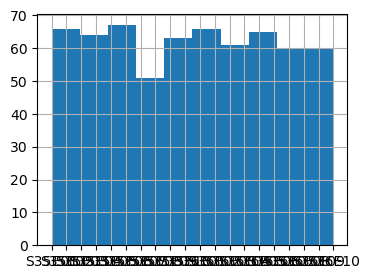

In [6]:
plt.figure(figsize=(4,3))
datos['variedad'].hist()
plt.show()

## **5. Separacion de datos, para entrenamiento y test**

In [7]:
x = datos.drop(['variedad'], axis=1)
y = datos['variedad']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, train_size=0.7)
x_train.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89991,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000
12,86,107,118,110,109,121,125,118,120,118,...,117,118,115,111,112,112,108,113,112,107
564,103,108,111,122,134,132,132,129,124,134,...,88,78,83,89,103,111,114,114,112,110
538,108,104,102,104,110,117,116,115,109,101,...,82,79,78,78,84,89,90,90,89,89
177,94,97,99,100,100,100,100,101,102,100,...,84,71,65,78,89,95,95,86,76,72
513,110,101,98,98,106,114,122,120,118,117,...,98,98,98,96,94,89,90,97,100,101


## **6. Entrenamiento de Naive Bayes**

In [8]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [9]:
# Exactitud del entrenamiento
NaiveBayes.score(x_test, y_test)

0.6256684491978609

## **7. Prueba(test) del modelo**

In [10]:
# Datos de prueba
x_test.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89991,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000
162,120,110,106,103,98,104,114,114,116,117,...,92,94,100,91,94,91,105,96,93,94
69,144,144,144,145,145,145,144,143,143,144,...,117,108,111,111,117,116,109,108,112,116
204,83,90,121,121,112,114,118,117,119,122,...,139,135,137,140,142,143,143,142,140,141
77,104,105,107,109,110,110,109,108,107,105,...,90,89,88,90,90,88,84,86,87,87
159,100,103,109,116,116,111,108,109,119,119,...,105,103,105,100,75,70,67,95,110,99


In [11]:
# Prediccion con los datos de test
pred = NaiveBayes.predict(x_test)
print(pred)

['S35E05' 'S35E04' 'S35E07' 'S35E03' 'S35E05' 'S35E05' 'S35E05' 'S35E10'
 'S35E03' 'S36E08' 'S35E01' 'S35E06' 'S35E02' 'S35E10' 'S35E10' 'S35E06'
 'S36E04' 'S36E08' 'S35E07' 'S36E01' 'S35E09' 'S36E02' 'S36E08' 'S36E08'
 'S36E10' 'S35E06' 'S35E09' 'S36E07' 'S36E08' 'S35E02' 'S35E01' 'S35E02'
 'S35E08' 'S35E02' 'S35E06' 'S36E10' 'S36E09' 'S35E05' 'S35E03' 'S35E03'
 'S35E02' 'S35E07' 'S36E09' 'S36E03' 'S36E02' 'S36E07' 'S35E01' 'S36E01'
 'S35E02' 'S36E09' 'S35E02' 'S35E10' 'S36E09' 'S35E09' 'S36E05' 'S36E06'
 'S35E09' 'S35E01' 'S36E03' 'S35E07' 'S36E04' 'S35E10' 'S36E02' 'S35E07'
 'S36E03' 'S36E02' 'S35E02' 'S35E10' 'S36E09' 'S35E05' 'S36E02' 'S35E06'
 'S36E09' 'S35E04' 'S35E08' 'S36E09' 'S36E04' 'S35E02' 'S36E07' 'S36E09'
 'S35E02' 'S36E09' 'S35E07' 'S36E07' 'S35E01' 'S35E01' 'S35E07' 'S36E01'
 'S36E01' 'S36E07' 'S36E09' 'S35E06' 'S35E02' 'S36E09' 'S36E07' 'S36E09'
 'S35E04' 'S35E08' 'S36E01' 'S35E06' 'S35E01' 'S35E10' 'S36E02' 'S36E01'
 'S36E08' 'S36E07' 'S35E08' 'S35E10' 'S35E02' 'S36E

## **8. Matriz de confusion y metricas**

In [12]:
# Dataframe con las etiqueta reales (y_test) y las generadas pro el modelo (pred)

# Crear una lista de tuplas con los valores de y_test y pred
resultados = list(zip(y_test, pred))

# Crear el Dataframe a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=['y_test', 'pred'])
df

,y_test,pred
0,S35E05,S35E05
1,S35E03,S35E04
2,S35E07,S35E07
3,S35E03,S35E03
4,S35E05,S35E05
...,...,...
182,S35E10,S35E04
183,S36E05,S36E05
184,S35E07,S35E07
185,S36E05,S35E02


In [13]:
# Generar la matriz de confusion
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusion')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusion
[[ 6  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  1  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  5  1  0  0  1  0  2  1  0  0  0]
 [ 0  0  1  3  7  0  2  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  6  3  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  1  0  5  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  5  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  8  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  2  0  1  0  0  1  0  0  0]
 [ 0  2  0  0  0  0  1  0  0  0  0  0  1  0  2  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  2 

<Axes: >

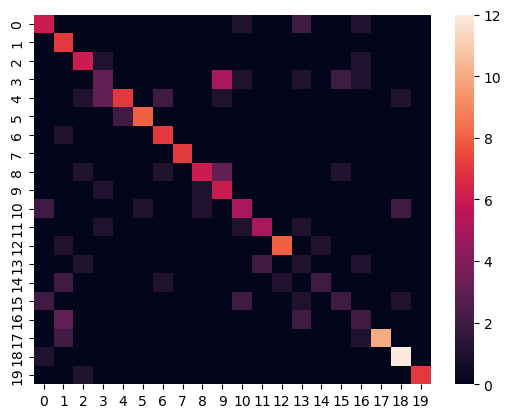

In [14]:
# Mapa de calor
sns.heatmap(MatrizConfusion)

## **9. Prediccion**

In [15]:
x_train.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       ...
       'p89991', 'p89992', 'p89993', 'p89994', 'p89995', 'p89996', 'p89997',
       'p89998', 'p89999', 'p90000'],
      dtype='object', length=90000)

In [16]:
import cv2
pixel = []
# Leer nuevo archivo de imagen en escala de grices
image = cv2.imread('./nuevo_corte.jpg', cv2.IMREAD_GRAYSCALE)
# Reescala la imagen a una dimension de 300x300 pixeles
image_rescaled = cv2.resize(image, (300,300), interpolation=cv2.INTER_AREA)
# Obtienen imagen vectorizado y etiquetado
img = np.reshape(image_rescaled, (90000))
pixel.append(img)
# Convierte array de imagenes a dataframe de pandas
nuevo=np.array(pixel)
nuevo

pred = NaiveBayes.predict(nuevo)
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['S35E07'], dtype='<U6')